In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df_org = pd.read_csv("./data/CarPrice.csv")
df = df_org.copy()
df.head()
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

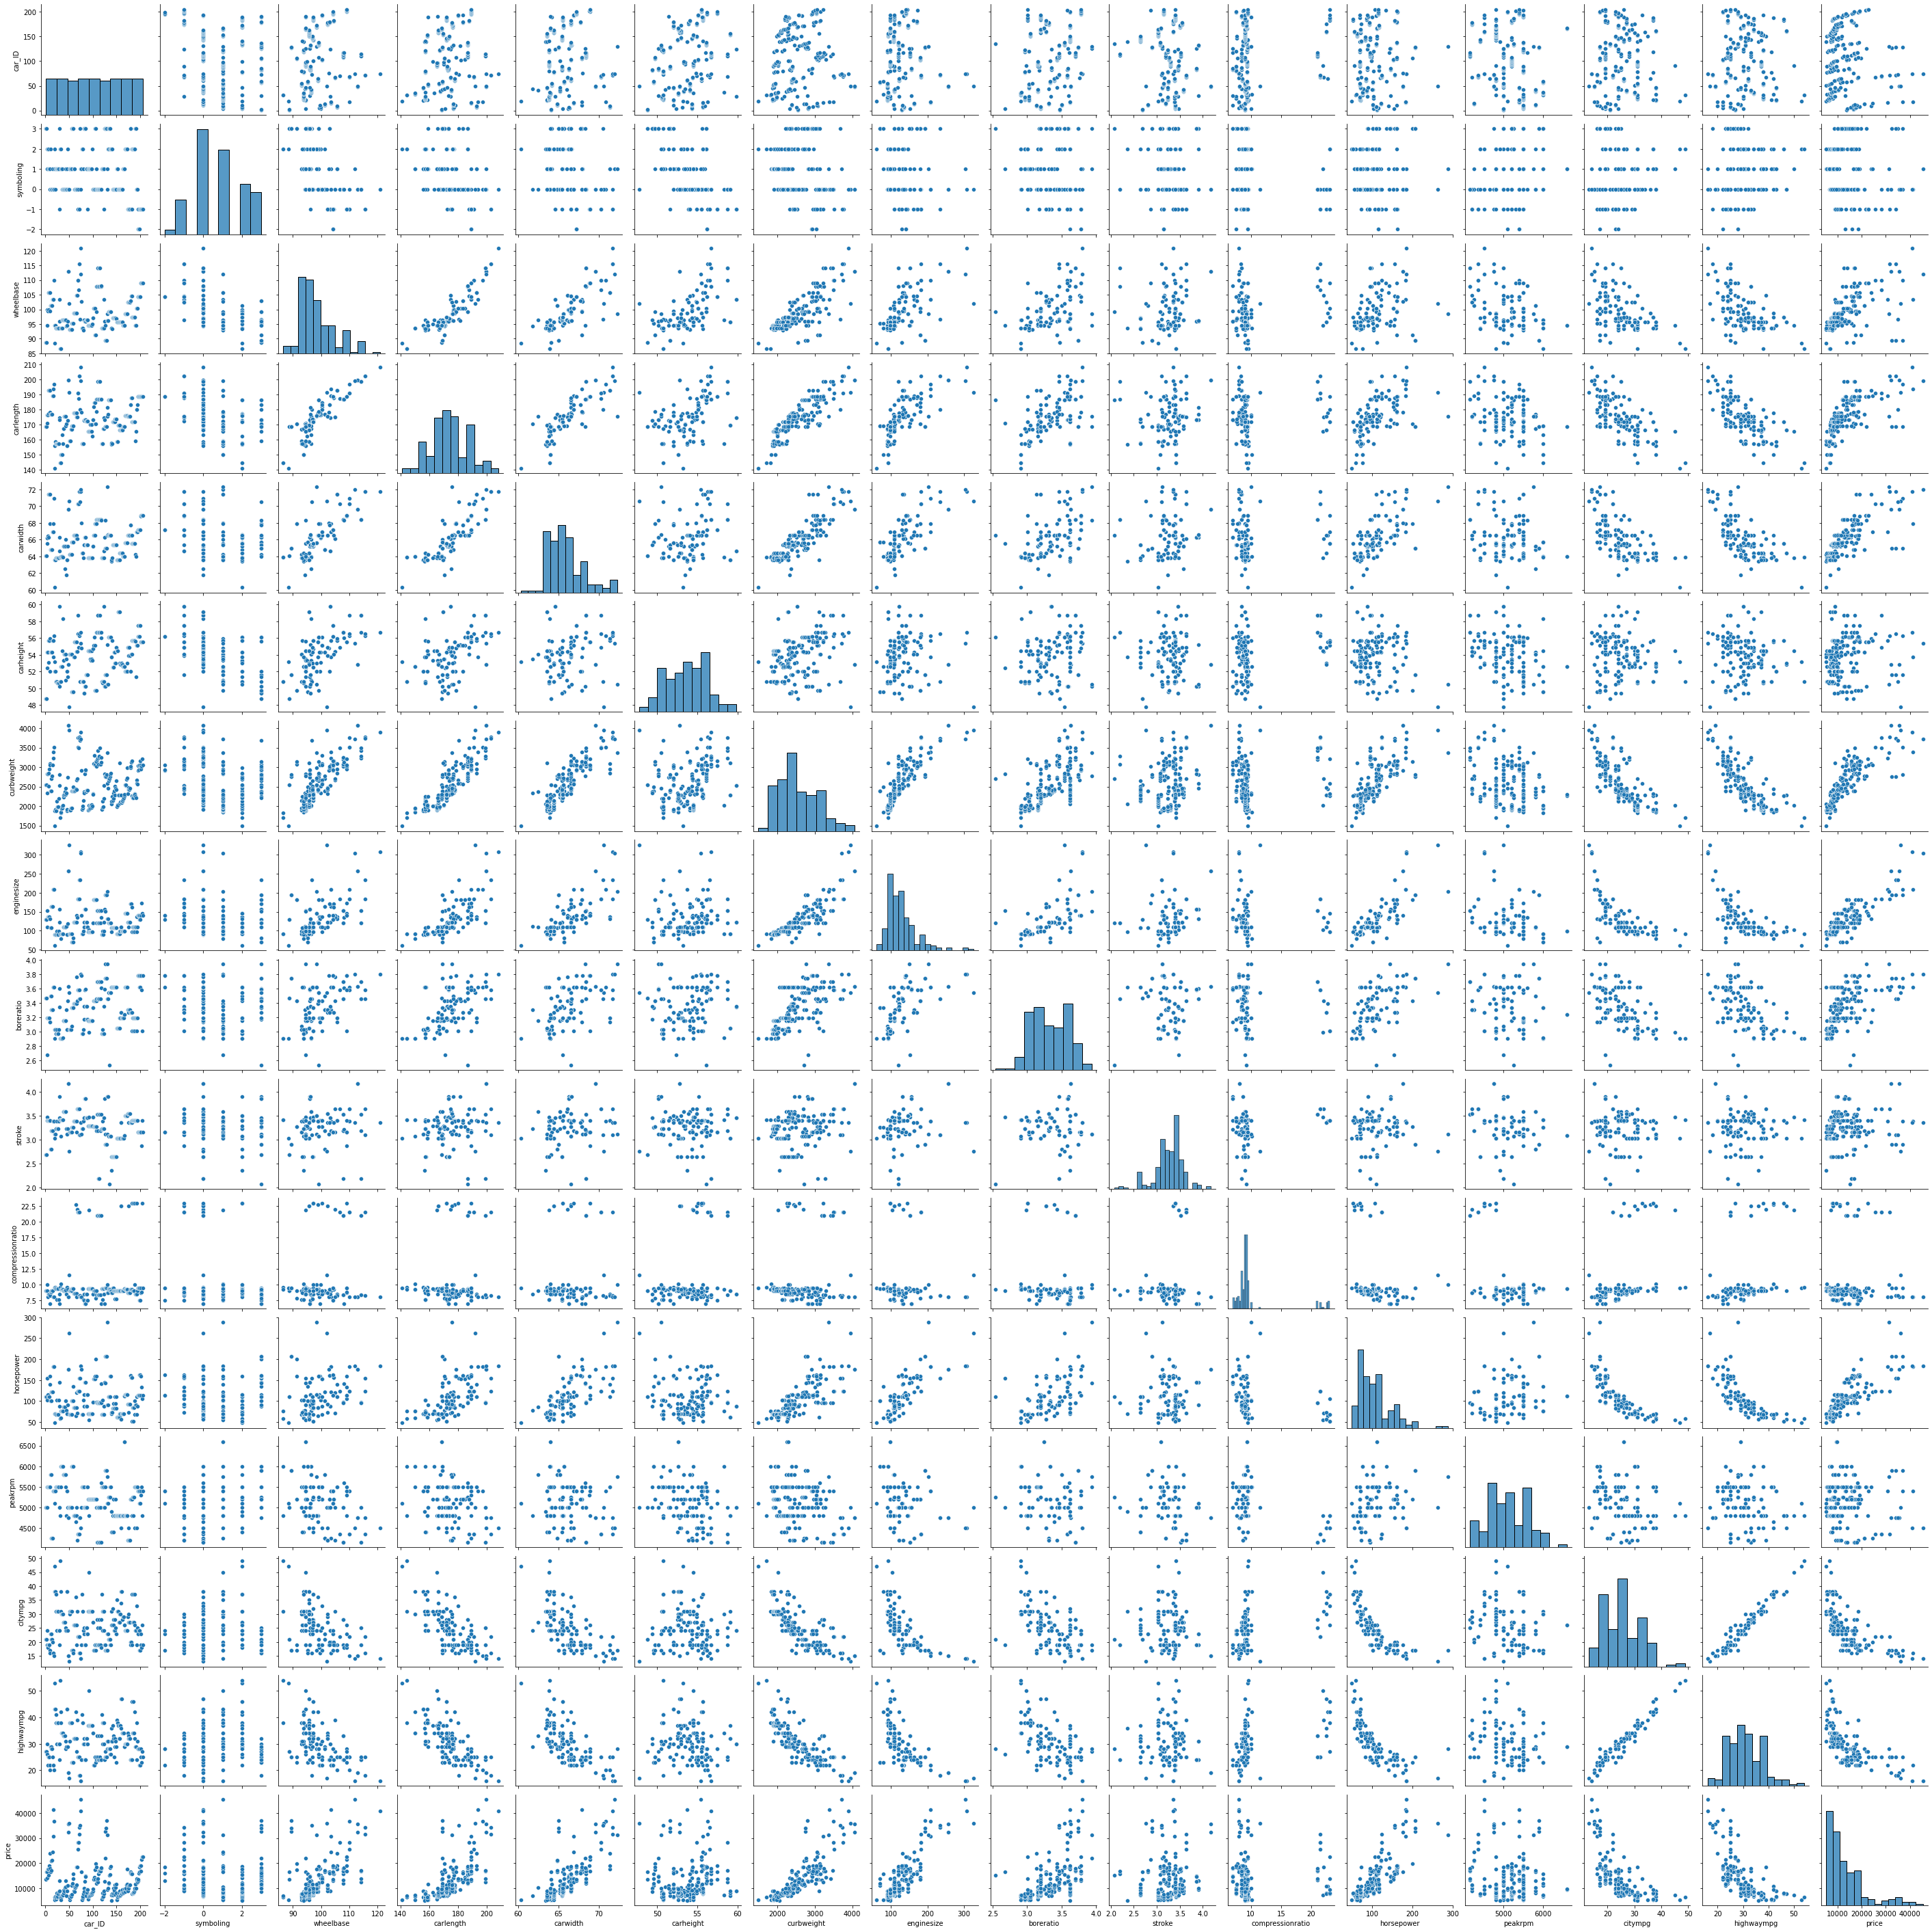

In [2]:
# Visualizing numeric data - histograms, scatters.
sns.pairplot(df)

In [3]:
# Target is a last column "price".
print("data-set shape:", df.shape)
print('\n type of data-set\n', df.dtypes.value_counts())
isnull_series = df.isnull().sum()
print('\n null columns', isnull_series[isnull_series>0].sort_values(ascending=False))

data-set shape: (205, 26)

 type of data-set
 object     10
int64       8
float64     8
dtype: int64

 null columns Series([], dtype: int64)


**data-set is of 26 features with 205 records, types of features are object and numeric. There is no nulls. - yey -**

<AxesSubplot:title={'center':'Original Sale Price Histogram'}, xlabel='price', ylabel='Density'>

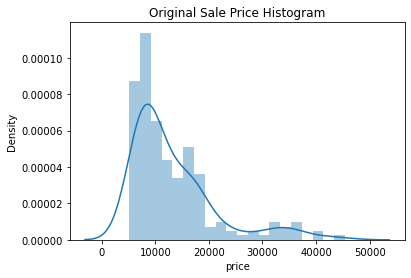

In [4]:
# checking if target is following "normal distribution"
plt.title('Original Sale Price Histogram')
sns.distplot(df['price'],bins=20)

**Target data is skewed to the left. Need to be log-transformed.**

<AxesSubplot:title={'center':'Log Transformed Price Histogram'}, xlabel='price', ylabel='Density'>

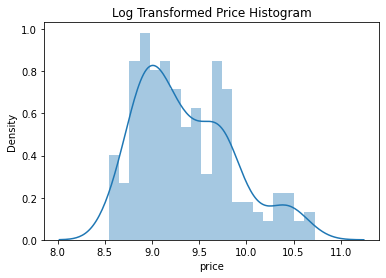

In [5]:
plt.title('Log Transformed Price Histogram')
sns.distplot(np.log1p(df['price']), bins=20)

In [6]:
# Well. Looks better than before. Apply it to DataFrame
original_price = df['price']
df['price'] = np.log1p(df['price'])

In [7]:
# car_ID is an identifier - need to delete the colum.
df.drop('car_ID', axis=1, inplace = True )
# symboling seems categorial and need to be encoded.
df["symboling"]=df["symboling"].astype("str")

In [8]:
df["symboling"].dtype

dtype('O')

In [9]:
df_keys=df.keys()

In [10]:
for key in df_keys:
    print(df[key].value_counts())

0     67
1     54
2     32
3     27
-1    22
-2     3
Name: symboling, dtype: int64
toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64
gas       185
diesel     20
Name: fueltype, dtype: int64
std      168
turbo     37
Name: aspiration, dtype: int64
four    115
two      90
Name: doornumber, dtype: int64
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64
fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64
front    202
rear       3
Name: enginelocation, dtype: int64
94.5     21
93.7     20
95.7     13
96.5      8
97.3      7
98.4      7
104.3     6
100.4     6
107.9     6
98.8      6
99.1      6
96.3      6
109.1     5
93.1      5
97.2     

In [11]:
df_ohe = df.copy()
# If a colums has only two categories > LabelEncoding
# more than two categories >> OneHotEncoding
for key in df_keys:
    if df_ohe[key].dtypes=='O':
        if len(df_ohe[key].value_counts())<3:
            from sklearn.preprocessing import LabelEncoder
            labelEncoder = LabelEncoder()
            labelEncoder.fit(df_ohe[key])
            df_ohe[key]=labelEncoder.transform(df_ohe[key])
            df_ohe.drop(key, axis=1, inplace=True)
        else:
            df_ohe=pd.concat([df_ohe,pd.get_dummies(df_ohe[key])],axis=1)
            df_ohe.drop(key, axis=1, inplace=True)



In [12]:
df_ohe

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,twelve,two,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,1,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,0,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0,0,0,0,0,0,0,1,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,...,0,0,0,0,0,0,0,1,0,0
201,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,...,0,0,0,0,0,0,0,1,0,0
202,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,...,0,0,0,0,0,0,0,1,0,0
203,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,...,0,0,0,0,0,1,0,0,0,0


In [13]:
print('get_dummies() 수행 후 데이터 Shape:', df_ohe.shape)
# 중간에 삭제 되는 데이터가 있어서 변수가 오히려 줄어들었다.

get_dummies() 수행 후 데이터 Shape: (205, 197)


In [14]:
# 선형 회귀 모델 학습/예측평가
def get_rmse(model):
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test,pred)
    rmse = np.sqrt(mse)
    print(model.__class__.__name__, '로그 변환된 RMSE:', np.round(rmse,3))
    return rmse
    
def get_rmses(models):
    rmses=[]
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

In [15]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

y_target = df_ohe['price']
X_features = df_ohe.drop('price', axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

# LinearRegression, Ridge, Lasso < train, predict, RMSE)
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

models=[lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

LinearRegression 로그 변환된 RMSE: 0.338
Ridge 로그 변환된 RMSE: 0.175
Lasso 로그 변환된 RMSE: 0.21


[0.3377359652446923, 0.17507098455636264, 0.21015695001950838]

In [16]:
def get_top_bottom_coef(model, n=10):
    # coef_ 속성을 기반으로 Series 객체를 생성. index는 칼럼명
    coef = pd.Series(model.coef_, index=X_features.columns)
    
    # +상위 10개, -하위 10개 회귀계수를 추출해 반환
    coef_high = coef.sort_values(ascending=False).head(n)
    coef_low = coef.sort_values(ascending=False).tail(n)
    return coef_high, coef_low

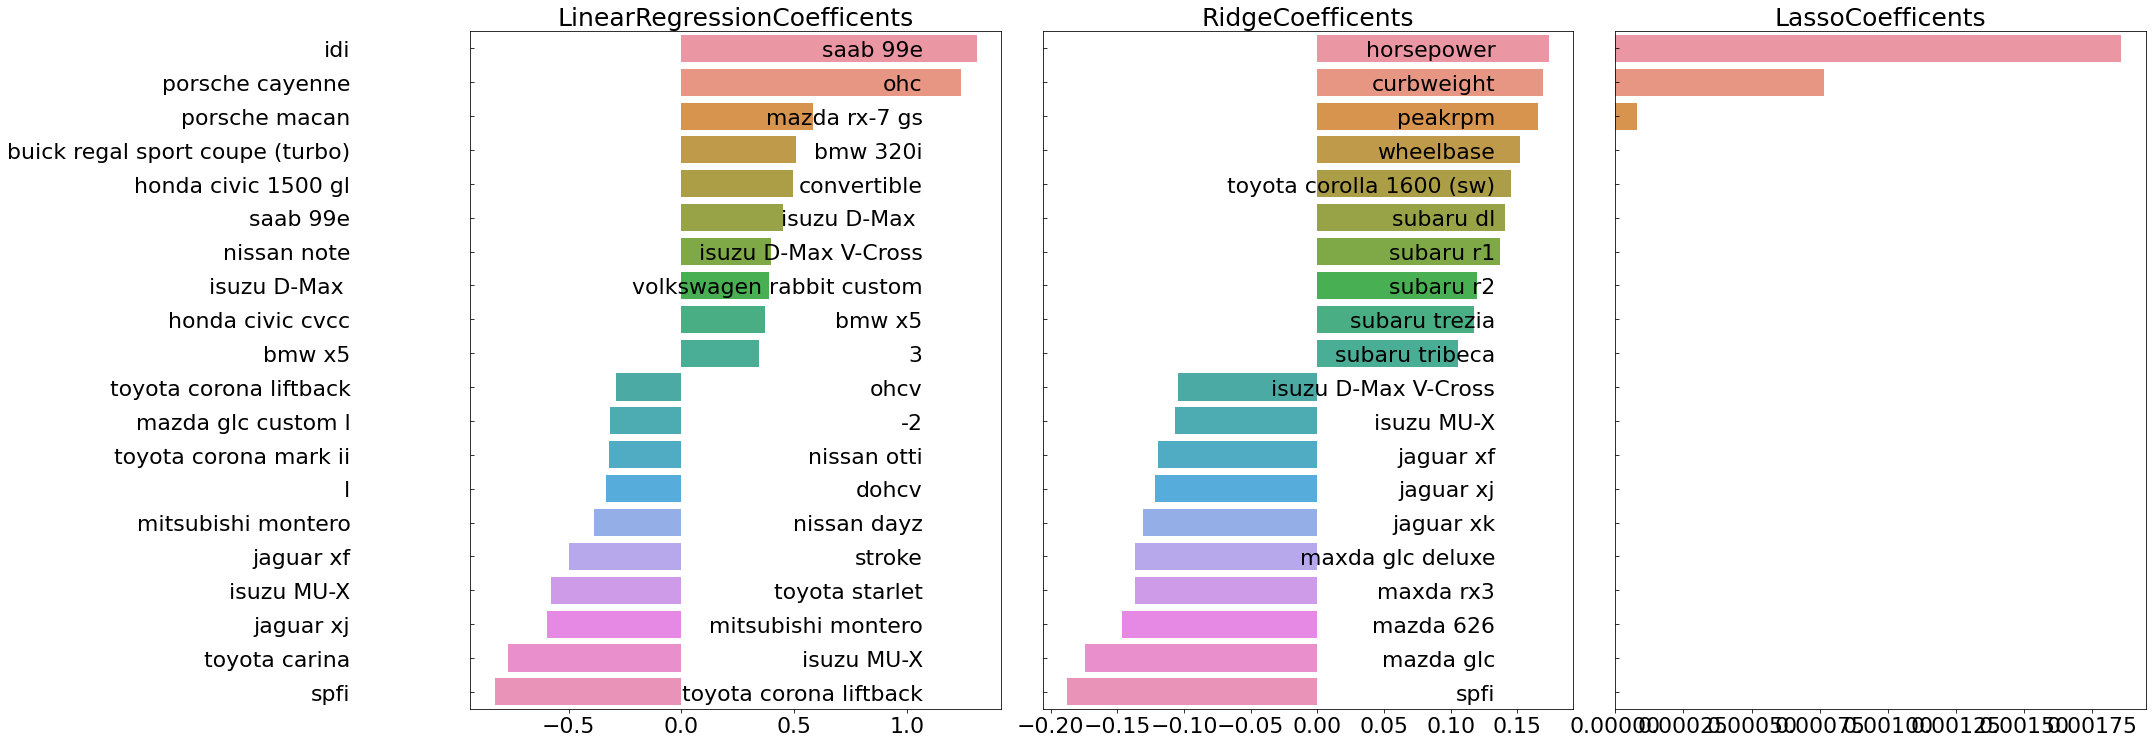

In [17]:
# 회귀 계수 시각화 
def visualize_coefficient(models):
    # 3개 회귀 모델의 시각화를 위해 3개의 칼럼을 가지는 subplot을 생성
    fig, axs = plt.subplots(figsize=(24, 10), nrows=1, ncols=3)
    fig.tight_layout()
    # 입력 인자로 받은 list 객체인 models에서 차례로 model을 추출해 회귀계수 시각화
    for i_num, model in enumerate(models):
        # 상위 10개, 하위 10개 회귀 계수를 구하고, 이를 판다스 concat으로 결합
        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat([coef_high, coef_low])
        #ax subplot에 barchar로 표현, 한 화면에 표현하기 위해 tick label 위치와 font 크기 조정
        axs[i_num].set_title(model.__class__.__name__+'Coefficents', size=25)
        axs[i_num].tick_params(axis='y', direction='in', pad=120)
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values, y=coef_concat.index, ax=axs[i_num])
    
# 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 회귀 계수 시각화
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

In [18]:
# 5개의 교차 검증 폴드 세트로 분합해 평균 RMSE를 측정해 보자. cross_val_score()

from sklearn.model_selection import cross_val_score

def get_avg_rmse_cv(models):
    for model in models:
        # 분할 하지 않고 전체 데이터로 cross_val_score()수행. 모델별 CV RMSE 값과 평균 RMSE 출력
        rmse_list=np.sqrt(-cross_val_score(model, X_features, y_target, scoring="neg_mean_squared_error", cv=5))
        rmse_avg = np.mean(rmse_list)
        print('\n{0} CV RMSE 값 리스트:{1}'.format(model.__class__.__name__, np.round(rmse_list,3)))
        print('{0} CV 평균 RMSE 값:{1}'.format(model.__class__.__name__, np.round(rmse_avg,3)))


models=[lr_reg, ridge_reg, lasso_reg]
get_avg_rmse_cv(models)


LinearRegression CV RMSE 값 리스트:[0.301 0.378 0.381 0.439 0.238]
LinearRegression CV 평균 RMSE 값:0.347

Ridge CV RMSE 값 리스트:[0.222 0.247 0.182 0.206 0.258]
Ridge CV 평균 RMSE 값:0.223

Lasso CV RMSE 값 리스트:[0.243 0.198 0.222 0.299 0.16 ]
Lasso CV 평균 RMSE 값:0.224


In [19]:
from sklearn.model_selection import GridSearchCV

def print_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params,
                             scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X_features, y_target)
    rmse = np.sqrt(-1*grid_model.best_score_)
    print('{0} 5 CV 시 최적 평균 RMSE 값:{1}, 최적 alpha:{2}'.format(model.__class__.__name__,
                                                            np.round(rmse,4), grid_model.best_params_))
ridge_params={'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15,20]}
lasso_params={'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5,10]}
print_best_params(ridge_reg, ridge_params)
print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값:0.2042, 최적 alpha:{'alpha': 20}
Lasso 5 CV 시 최적 평균 RMSE 값:0.2085, 최적 alpha:{'alpha': 0.03}


**Ridge and Lasso shows better results after optimization.**

LinearRegression 로그 변환된 RMSE: 0.338
Ridge 로그 변환된 RMSE: 0.175
Lasso 로그 변환된 RMSE: 0.192


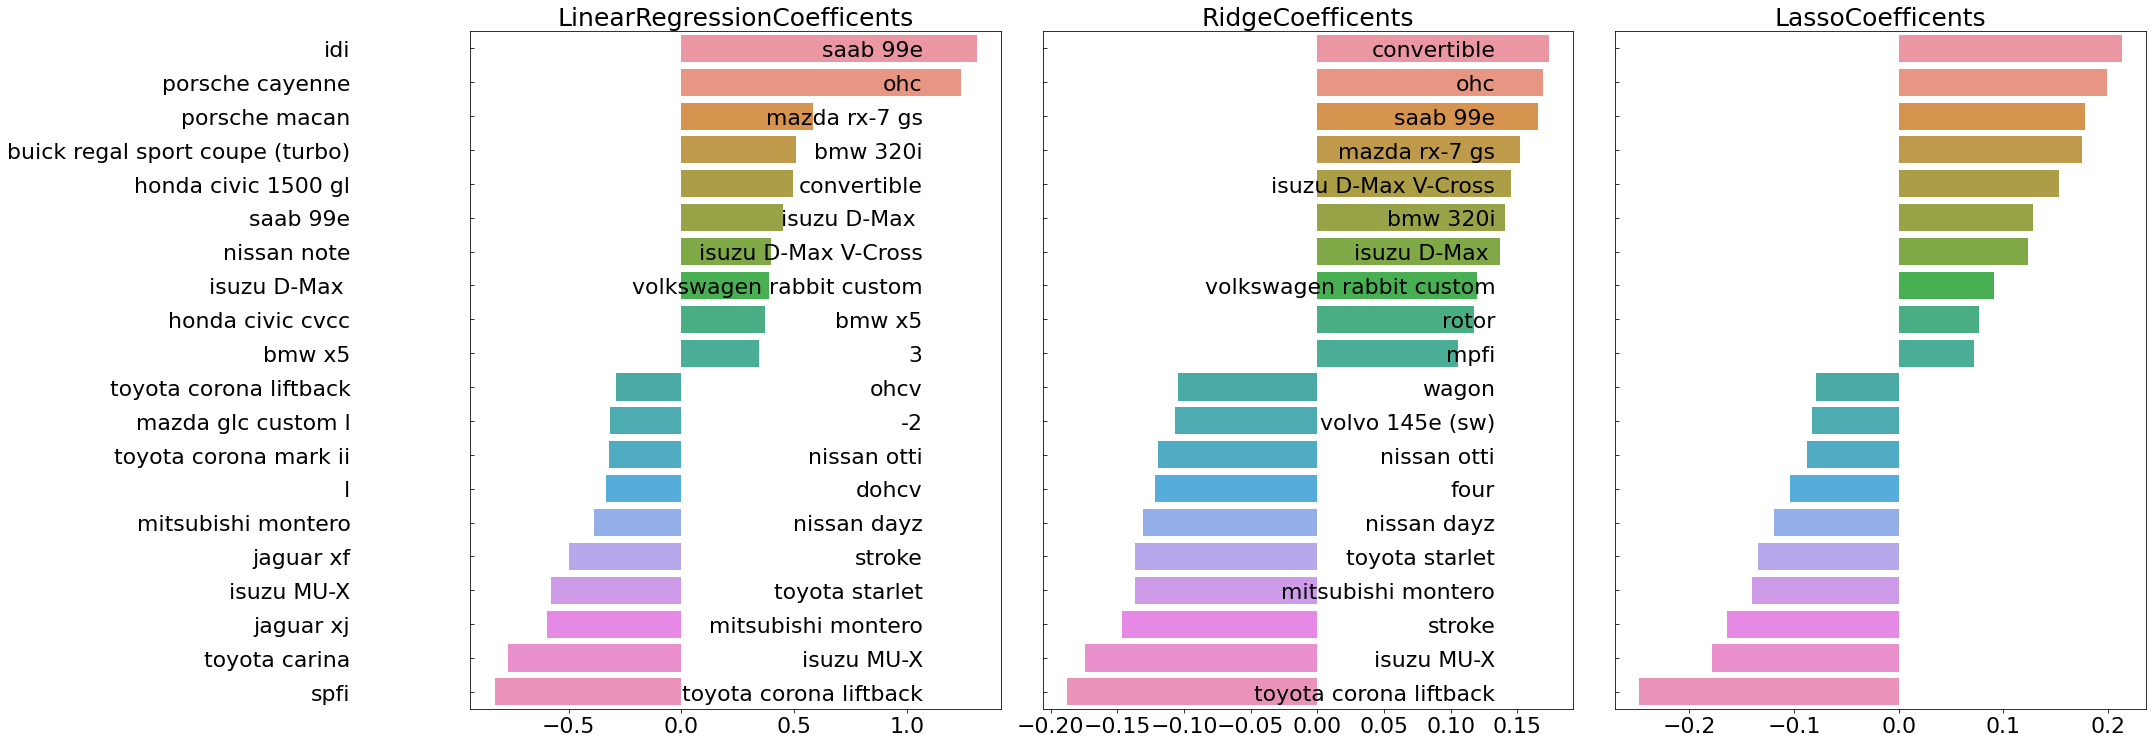

In [20]:
# with best alphas upper, train, predict, valudation.
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=1) # 위에서 찾은 alpha 값보다 5이상 10미만의 값들이 rmse가 더 적게 나온다.
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

# print RMSEs for all models.
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

# visualize Coefficients for all models.
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

**Lasso is better after optimizing.**

In [21]:
from scipy.stats import skew

# object가 아닌 숫자형 피처의 칼럼 Index 객체 추출
features_index = df.dtypes[df.dtypes !='object'].index
# df에 index를 []로 입력하면 해당하는 칼럼 데이터 세트 반환, apply lambda로 skew() 호출
skew_features = df[features_index].apply(lambda x :skew(x))
# skew(왜곡) 정도가 1 이상인 칼럼만 추출
skew_features_top = skew_features[skew_features>1]
print(skew_features_top.sort_values(ascending=False))

compressionratio    2.591720
enginesize          1.933375
horsepower          1.395006
wheelbase           1.042514
dtype: float64


In [22]:
df[skew_features_top.index]

,wheelbase,enginesize,compressionratio,horsepower
0,88.6,130,9.0,111
1,88.6,130,9.0,111
2,94.5,152,9.0,154
3,99.8,109,10.0,102
4,99.4,136,8.0,115
...,...,...,...,...
200,109.1,141,9.5,114
201,109.1,141,8.7,160
202,109.1,173,8.8,134
203,109.1,145,23.0,106


In [23]:
# 왜곡정도가 높은 피처를 로그 변환한다.
df[skew_features_top.index]=np.log1p(df[skew_features_top.index])

In [24]:
df[skew_features_top.index]

,wheelbase,enginesize,compressionratio,horsepower
0,4.495355,4.875197,2.302585,4.718499
1,4.495355,4.875197,2.302585,4.718499
2,4.559126,5.030438,2.302585,5.043425
3,4.613138,4.700480,2.397895,4.634729
4,4.609162,4.919981,2.197225,4.753590
...,...,...,...,...
200,4.701389,4.955827,2.351375,4.744932
201,4.701389,4.955827,2.272126,5.081404
202,4.701389,5.159055,2.282382,4.905275
203,4.701389,4.983607,3.178054,4.672829


In [25]:
df_ohe = df.copy()
# If a colums has only two categories > LabelEncoding
# more than two categories >> OneHotEncoding
for key in df_keys:
    if df_ohe[key].dtypes=='O':
        if len(df_ohe[key].value_counts())<3:
            from sklearn.preprocessing import LabelEncoder
            labelEncoder = LabelEncoder()
            labelEncoder.fit(df_ohe[key])
            df_ohe[key]=labelEncoder.transform(df_ohe[key])
        else:
            df_ohe=pd.concat([df_ohe,pd.get_dummies(df_ohe[key])],axis=1)
            df_ohe.drop(key, axis=1, inplace=True)

In [26]:
print('get_dummies() 수행 후 데이터 Shape:', df_ohe.shape)
# 중간에 삭제 되는 데이터가 있어서 변수가 오히려 줄어들었다.

get_dummies() 수행 후 데이터 Shape: (205, 201)


In [27]:
# 선형 회귀 모델 학습/예측평가
def get_rmse(model):
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test,pred)
    rmse = np.sqrt(mse)
    print(model.__class__.__name__, '로그 변환된 RMSE:', np.round(rmse,3))
    return rmse
    
def get_rmses(models):
    rmses=[]
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

In [28]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

y_target = df_ohe['price']
X_features = df_ohe.drop('price', axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

# LinearRegression, Ridge, Lasso < train, predict, RMSE)
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

models=[lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

LinearRegression 로그 변환된 RMSE: 179666834.314
Ridge 로그 변환된 RMSE: 0.154
Lasso 로그 변환된 RMSE: 0.235


[179666834.31435058, 0.1544677242456915, 0.2345176862957141]

In [29]:
def get_top_bottom_coef(model, n=10):
    # coef_ 속성을 기반으로 Series 객체를 생성. index는 칼럼명
    coef = pd.Series(model.coef_, index=X_features.columns)
    
    # +상위 10개, -하위 10개 회귀계수를 추출해 반환
    coef_high = coef.sort_values(ascending=False).head(n)
    coef_low = coef.sort_values(ascending=False).tail(n)
    return coef_high, coef_low

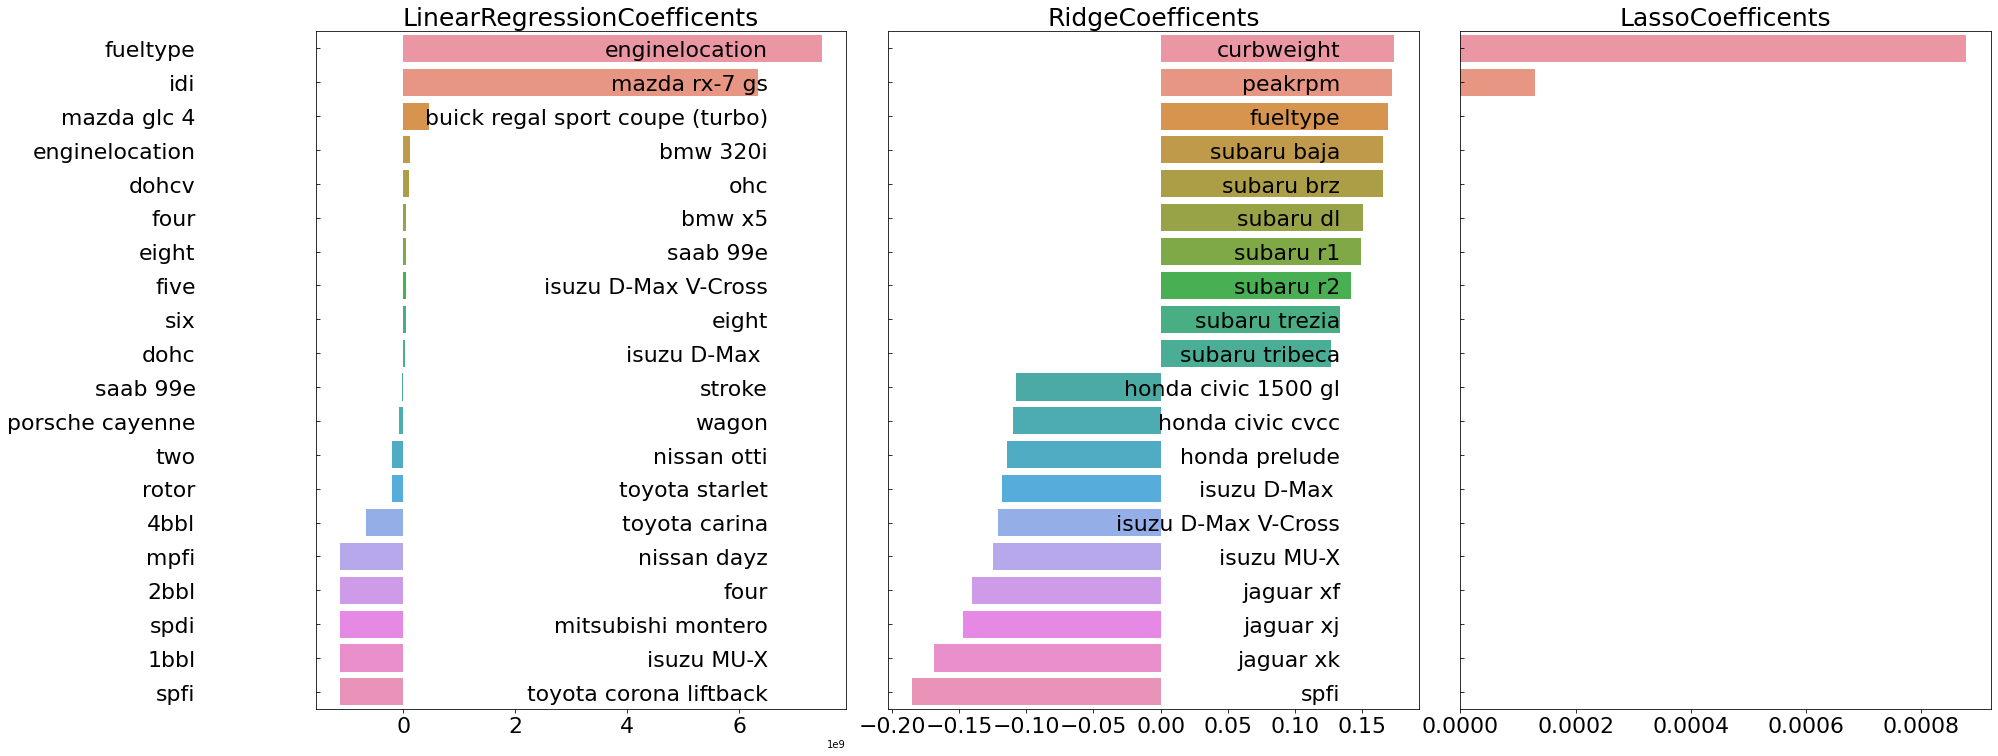

In [30]:
# 회귀 계수 시각화 
def visualize_coefficient(models):
    # 3개 회귀 모델의 시각화를 위해 3개의 칼럼을 가지는 subplot을 생성
    fig, axs = plt.subplots(figsize=(24, 10), nrows=1, ncols=3)
    fig.tight_layout()
    # 입력 인자로 받은 list 객체인 models에서 차례로 model을 추출해 회귀계수 시각화
    for i_num, model in enumerate(models):
        # 상위 10개, 하위 10개 회귀 계수를 구하고, 이를 판다스 concat으로 결합
        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat([coef_high, coef_low])
        #ax subplot에 barchar로 표현, 한 화면에 표현하기 위해 tick label 위치와 font 크기 조정
        axs[i_num].set_title(model.__class__.__name__+'Coefficents', size=25)
        axs[i_num].tick_params(axis='y', direction='in', pad=120)
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values, y=coef_concat.index, ax=axs[i_num])
    
# 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 회귀 계수 시각화
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

In [31]:
# 5개의 교차 검증 폴드 세트로 분합해 평균 RMSE를 측정해 보자. cross_val_score()

from sklearn.model_selection import cross_val_score

def get_avg_rmse_cv(models):
    for model in models:
        # 분할 하지 않고 전체 데이터로 cross_val_score()수행. 모델별 CV RMSE 값과 평균 RMSE 출력
        rmse_list=np.sqrt(-cross_val_score(model, X_features, y_target, scoring="neg_mean_squared_error", cv=5))
        rmse_avg = np.mean(rmse_list)
        print('\n{0} CV RMSE 값 리스트:{1}'.format(model.__class__.__name__, np.round(rmse_list,3)))
        print('{0} CV 평균 RMSE 값:{1}'.format(model.__class__.__name__, np.round(rmse_avg,3)))


models=[lr_reg, ridge_reg, lasso_reg]
get_avg_rmse_cv(models)


LinearRegression CV RMSE 값 리스트:[2.22060460e+07 1.39237277e+08 1.14995685e+05 1.72028744e+06
 2.02501378e+06]
LinearRegression CV 평균 RMSE 값:33060724.034

Ridge CV RMSE 값 리스트:[0.239 0.22  0.212 0.229 0.251]
Ridge CV 평균 RMSE 값:0.23

Lasso CV RMSE 값 리스트:[0.26  0.189 0.244 0.3   0.161]
Lasso CV 평균 RMSE 값:0.231


In [32]:
from sklearn.model_selection import GridSearchCV

def print_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params,
                             scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X_features, y_target)
    rmse = np.sqrt(-1*grid_model.best_score_)
    print('{0} 5 CV 시 최적 평균 RMSE 값:{1}, 최적 alpha:{2}'.format(model.__class__.__name__,
                                                            np.round(rmse,4), grid_model.best_params_))
ridge_params={'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15,20]}
lasso_params={'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5,10]}
print_best_params(ridge_reg, ridge_params)
print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값:0.2201, 최적 alpha:{'alpha': 20}
Lasso 5 CV 시 최적 평균 RMSE 값:0.2321, 최적 alpha:{'alpha': 0.008}


LinearRegression 로그 변환된 RMSE: 179666834.314
Ridge 로그 변환된 RMSE: 0.154
Lasso 로그 변환된 RMSE: 0.151


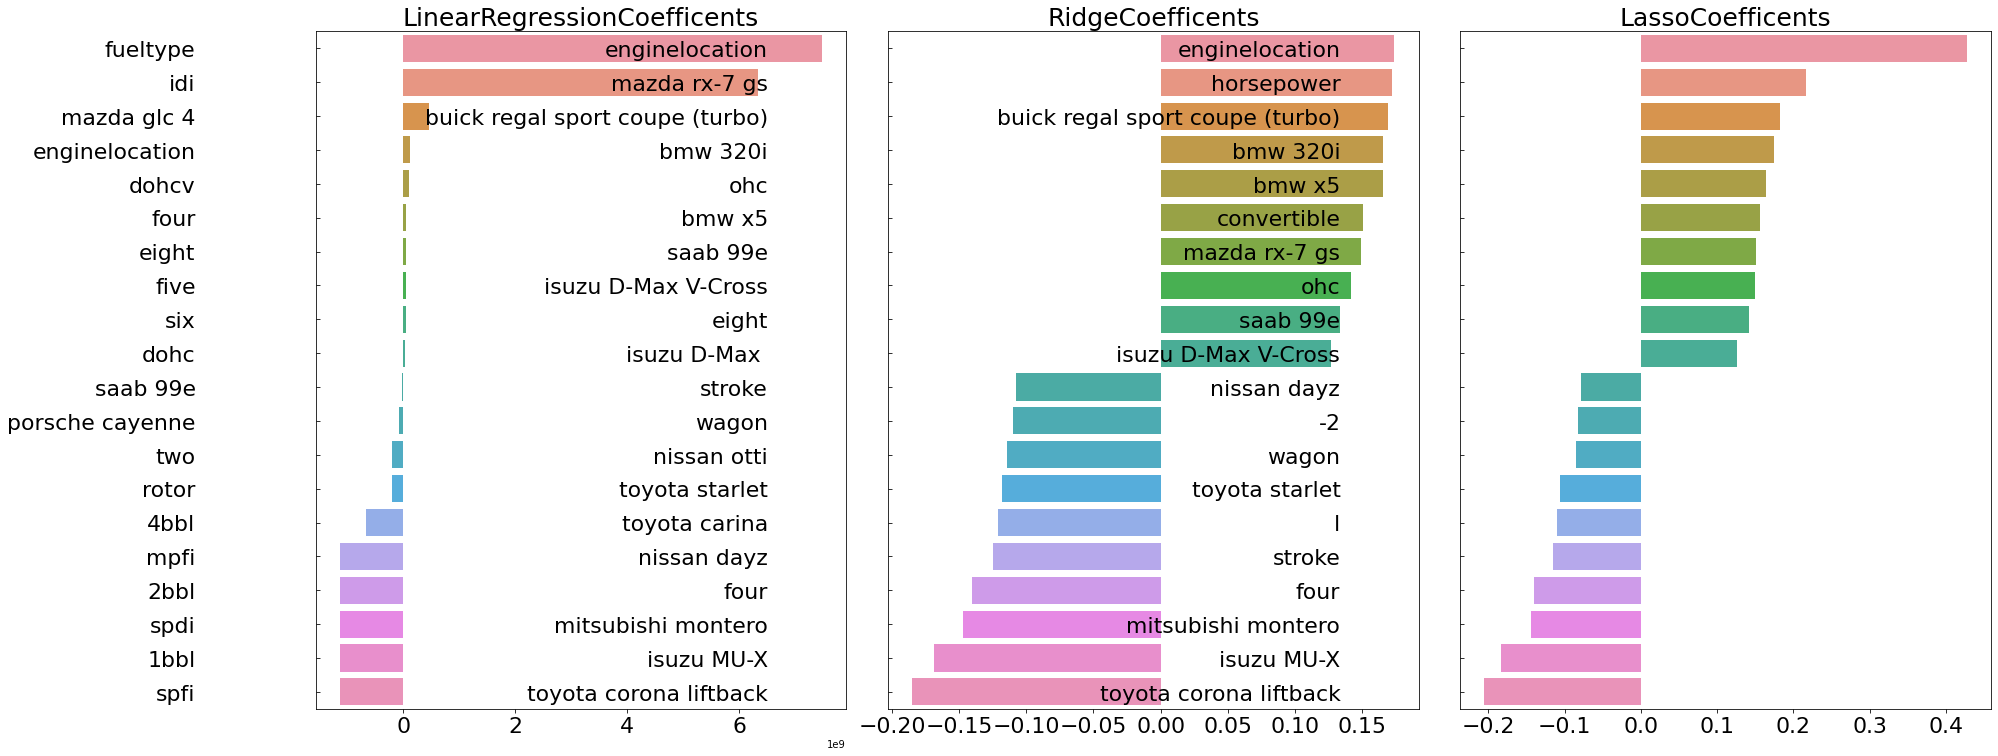

In [33]:
# with best alphas upper, train, predict, valudation.
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=1) # 위에서 찾은 alpha 값보다 5이상 10미만의 값들이 rmse가 더 적게 나온다.
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

# print RMSEs for all models.
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

# visualize Coefficients for all models.
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

**after LogTransformation, results are much better.**

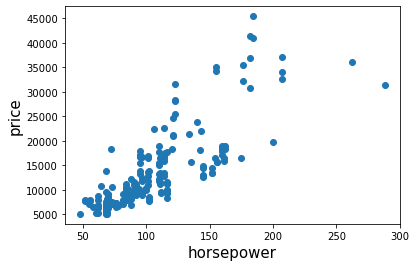

In [34]:
plt.scatter(x=df_org['horsepower'],y=df_org["price"])
plt.ylabel('price',fontsize=15)
plt.xlabel('horsepower',fontsize=15)
plt.show()

In [35]:
cond1 = df_ohe['horsepower']>np.log1p(250)
outlier_index = df_ohe[cond1].index

print("이상치 레코드 index :", outlier_index.values)
print("이상치 삭제 전 df_ohe shape :", df_ohe.shape)

df_ohe.drop(outlier_index, axis=0, inplace=True)
print("이상치 삭제 후 df_ohe shape :", df_ohe.shape)

이상치 레코드 index : [ 49 129]
이상치 삭제 전 df_ohe shape : (205, 201)
이상치 삭제 후 df_ohe shape : (203, 201)


In [36]:
df_ohe

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,twelve,two,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,1,0,1,0,4.495355,168.8,64.1,48.8,2548,4.875197,...,0,0,0,0,0,0,0,1,0,0
1,1,0,1,0,4.495355,168.8,64.1,48.8,2548,4.875197,...,0,0,0,0,0,0,0,1,0,0
2,1,0,1,0,4.559126,171.2,65.5,52.4,2823,5.030438,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,4.613138,176.6,66.2,54.3,2337,4.700480,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,4.609162,176.6,66.4,54.3,2824,4.919981,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,0,0,0,4.701389,188.8,68.9,55.5,2952,4.955827,...,0,0,0,0,0,0,0,1,0,0
201,1,1,0,0,4.701389,188.8,68.8,55.5,3049,4.955827,...,0,0,0,0,0,0,0,1,0,0
202,1,0,0,0,4.701389,188.8,68.9,55.5,3012,5.159055,...,0,0,0,0,0,0,0,1,0,0
203,0,1,0,0,4.701389,188.8,68.9,55.5,3217,4.983607,...,0,0,0,0,0,1,0,0,0,0


In [37]:
# 선형 회귀 모델 학습/예측평가
def get_rmse(model):
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test,pred)
    rmse = np.sqrt(mse)
    print(model.__class__.__name__, '로그 변환된 RMSE:', np.round(rmse,3))
    return rmse
    
def get_rmses(models):
    rmses=[]
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

In [38]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

y_target = df_ohe['price']
X_features = df_ohe.drop('price', axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

# LinearRegression, Ridge, Lasso < train, predict, RMSE)
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

models=[lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

LinearRegression 로그 변환된 RMSE: 35454049.421
Ridge 로그 변환된 RMSE: 0.17
Lasso 로그 변환된 RMSE: 0.201


[35454049.42109176, 0.17011445590497581, 0.2013686989509597]

In [39]:
def get_top_bottom_coef(model, n=10):
    # coef_ 속성을 기반으로 Series 객체를 생성. index는 칼럼명
    coef = pd.Series(model.coef_, index=X_features.columns)
    
    # +상위 10개, -하위 10개 회귀계수를 추출해 반환
    coef_high = coef.sort_values(ascending=False).head(n)
    coef_low = coef.sort_values(ascending=False).tail(n)
    return coef_high, coef_low

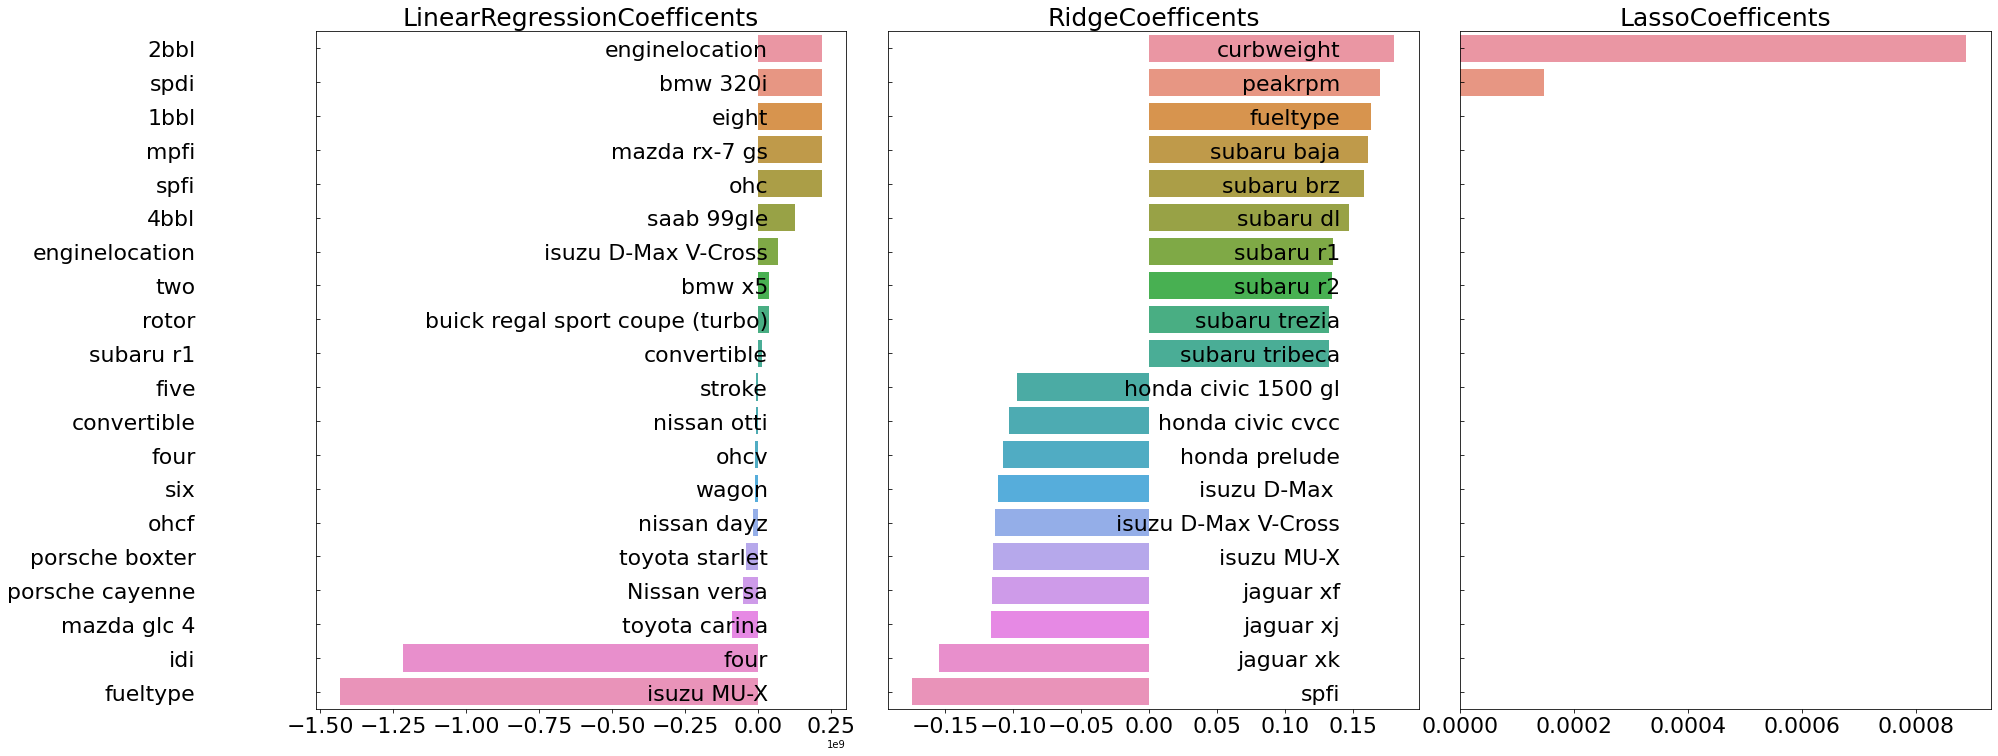

In [40]:
# 회귀 계수 시각화 
def visualize_coefficient(models):
    # 3개 회귀 모델의 시각화를 위해 3개의 칼럼을 가지는 subplot을 생성
    fig, axs = plt.subplots(figsize=(24, 10), nrows=1, ncols=3)
    fig.tight_layout()
    # 입력 인자로 받은 list 객체인 models에서 차례로 model을 추출해 회귀계수 시각화
    for i_num, model in enumerate(models):
        # 상위 10개, 하위 10개 회귀 계수를 구하고, 이를 판다스 concat으로 결합
        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat([coef_high, coef_low])
        #ax subplot에 barchar로 표현, 한 화면에 표현하기 위해 tick label 위치와 font 크기 조정
        axs[i_num].set_title(model.__class__.__name__+'Coefficents', size=25)
        axs[i_num].tick_params(axis='y', direction='in', pad=120)
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values, y=coef_concat.index, ax=axs[i_num])
    
# 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 회귀 계수 시각화
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

In [41]:
# 5개의 교차 검증 폴드 세트로 분합해 평균 RMSE를 측정해 보자. cross_val_score()

from sklearn.model_selection import cross_val_score

def get_avg_rmse_cv(models):
    for model in models:
        # 분할 하지 않고 전체 데이터로 cross_val_score()수행. 모델별 CV RMSE 값과 평균 RMSE 출력
        rmse_list=np.sqrt(-cross_val_score(model, X_features, y_target, scoring="neg_mean_squared_error", cv=5))
        rmse_avg = np.mean(rmse_list)
        print('\n{0} CV RMSE 값 리스트:{1}'.format(model.__class__.__name__, np.round(rmse_list,3)))
        print('{0} CV 평균 RMSE 값:{1}'.format(model.__class__.__name__, np.round(rmse_avg,3)))


models=[lr_reg, ridge_reg, lasso_reg]
get_avg_rmse_cv(models)


LinearRegression CV RMSE 값 리스트:[46003553.423 21804335.393  2228935.577 45030869.397  4425151.399]
LinearRegression CV 평균 RMSE 값:23898569.038

Ridge CV RMSE 값 리스트:[0.242 0.225 0.221 0.231 0.252]
Ridge CV 평균 RMSE 값:0.234

Lasso CV RMSE 값 리스트:[0.26  0.19  0.247 0.298 0.162]
Lasso CV 평균 RMSE 값:0.231


In [42]:
from sklearn.model_selection import GridSearchCV

def print_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params,
                             scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X_features, y_target)
    rmse = np.sqrt(-1*grid_model.best_score_)
    print('{0} 5 CV 시 최적 평균 RMSE 값:{1}, 최적 alpha:{2}'.format(model.__class__.__name__,
                                                            np.round(rmse,4), grid_model.best_params_))
ridge_params={'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15,20]}
lasso_params={'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5,10]}
print_best_params(ridge_reg, ridge_params)
print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값:0.224, 최적 alpha:{'alpha': 20}
Lasso 5 CV 시 최적 평균 RMSE 값:0.2348, 최적 alpha:{'alpha': 0.008}


LinearRegression 로그 변환된 RMSE: 35454049.421
Ridge 로그 변환된 RMSE: 0.17
Lasso 로그 변환된 RMSE: 0.172


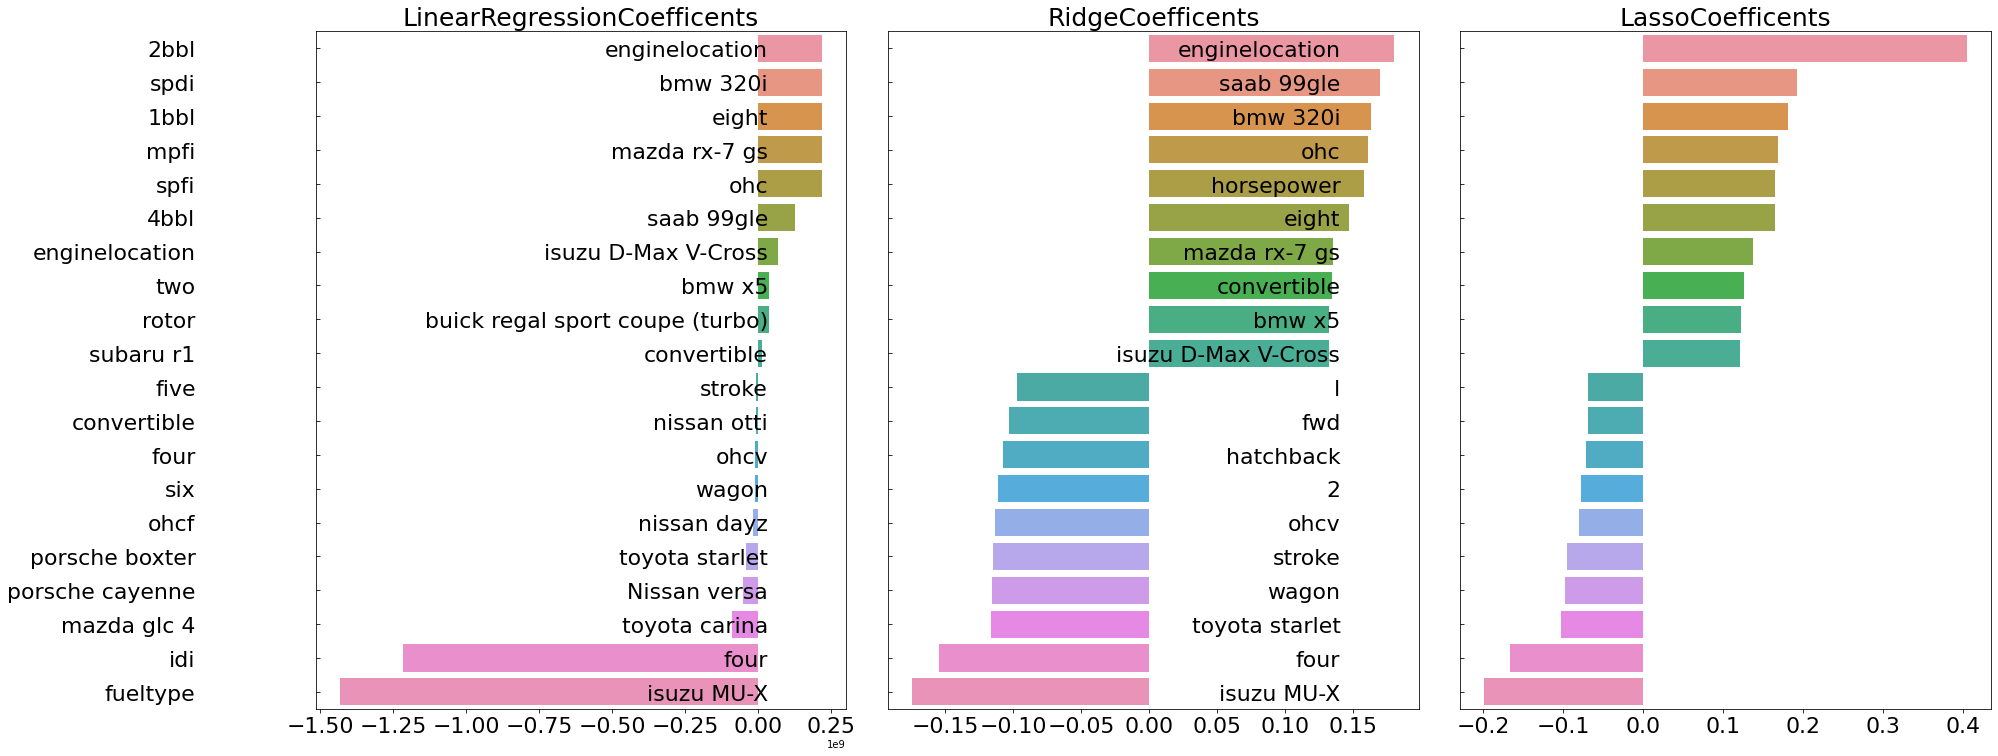

In [43]:
# with best alphas upper, train, predict, valudation.
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=1) # 위에서 찾은 alpha 값보다 5이상 10미만의 값들이 rmse가 더 적게 나온다.
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

# print RMSEs for all models.
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

# visualize Coefficients for all models.
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

**Removing Ouliers doesn't seem important - No changes after this process.**